In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [4]:
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [6]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(20000,)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(layers.Dense(16, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(layers.Dense(1, activation='sigmoid'))

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5203 - accuracy: 0.7883 - val_loss: 0.4062 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3177 - accuracy: 0.9005 - val_loss: 0.3420 - val_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2286 - accuracy: 0.9293 - val_loss: 0.2810 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1834 - accuracy: 0.9417 - val_loss: 0.2735 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1436 - accuracy: 0.9548 - val_loss: 0.2842 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1208 - accuracy: 0.9623 - val_loss: 0.2924 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1008 - accuracy: 0.9681 - val_loss: 0.3101 - val_accuracy: 0.8822
Epoch 8/20
30

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

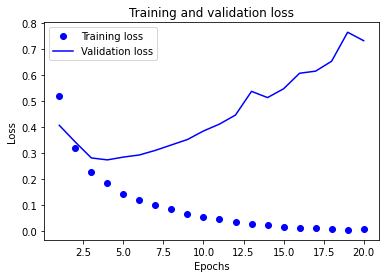

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

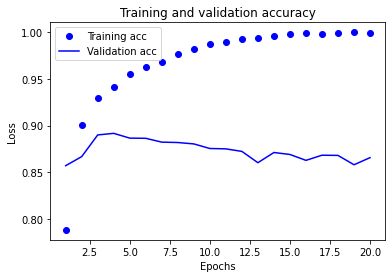

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
from pathlib import Path
import os
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  26.0M      0  0:00:03  0:00:03 --:--:-- 26.0M


In [16]:
import numpy as np
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels


In [17]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [20]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [21]:
normalize_text(trn_texts[0])

'kevin kline meg ryan among class actor always interest see despite review always find m ryan charm winsome actress nearly role kevin kline almost always worth watch say nearly almost large part movie first meg ryan play likeable character play weakwilled whiner begin grate nerve shortly open credit doesnt give several day later say kevin kline character even annoy le likeable even normally like two actor recommend give movie pas'

In [22]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'human-like robots are dump, but cute' # 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


In [23]:
texts = trn_texts + tst_texts
words = [word for text in texts for word in text.split()]
v = sorted(list(set(words)))


In [24]:
len(v)

438729

In [25]:
# normalized_text=[]
# for text in texts:
#   normalized_text.append(normalize_text(text))

# words = [word for text in normalized_text for word in text.split()]
# x = sorted(list(set(words)))

# len(x)

In [26]:
from collections import Counter
word_counts = Counter(["z","z","m","O"])

In [27]:
sorted(word_counts.items(), key=lambda x: x[1],  reverse=True)

[('z', 2), ('m', 1), ('O', 1)]

In [28]:
word_counts.items()

dict_items([('z', 2), ('m', 1), ('O', 1)])

In [29]:
from keras.preprocessing.text import Tokenizer

texts = trn_texts + tst_texts # This must be list of strings: 
texts[:10]

['Kevin Kline and Meg Ryan are among that class of actors which I am always interested in seeing, despite reviews. I have always found Ms. Ryan to be a charming and winsome actress in nearly all her roles, and Kevin Kline is almost always worth watching.<br /><br />I say "nearly" and "almost" in large part because of this movie.<br /><br />First off, Meg Ryan does not play a likeable character, she plays a weak-willed whiner who begins grating on your nerves shortly after the opening credits and doesn\'t give up until several days later. That said, Kevin Kline\'s character is even more annoying and less likeable. So, even if you normally like these two actors, I recommend your give this movie a pass.',
 'Oh dear, Oh dear. I started watching this not knowing what to expect. I couldn\'t believe what I was seeing. There were times when I thought it was a comedy. I loved how the government\'s plan to capture the terrorist leader is to air drop in one man, who is unarmed, and expect him to 

In [30]:
tok = Tokenizer()
tok.fit_on_texts(texts)

In [31]:
tok.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [32]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)

In [33]:
tok.word_index['UNK']

1

In [34]:
s = 'Hello World'
tok.texts_to_sequences(s.split())

[[5125], [182]]

In [35]:
tok.word_index["hello"]

5125

In [36]:
tok.word_index

{'UNK': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'so': 35,
 'who': 36,
 'from': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'out': 42,
 'about': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'when': 51,
 'more': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'my': 57,
 'even': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'than': 72,
 'much': 73,
 'we': 74,
 'bad': 75,
 'been': 76,
 'get': 77,
 'do': 78,
 'great': 79,
 'other': 80,
 'will': 81,
 'also': 82,
 'in

In [37]:
docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
tok.texts_to_sequences(docs)

[[1062, 18, 120], [5125, 182]]

In [38]:
from keras.preprocessing.sequence import pad_sequences
maxlen = max([len(t) for t in texts])

docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
l = tok.texts_to_sequences(docs)


l1 = np.array(pad_sequences(l,
                          maxlen=maxlen,
                          padding='post',
                          truncating='post'))
l1.shape

(2, 13704)

(array([3.4883e+04, 1.0845e+04, 2.9210e+03, 1.0330e+03, 2.9300e+02,
        1.4000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([   32. ,  1399.2,  2766.4,  4133.6,  5500.8,  6868. ,  8235.2,
         9602.4, 10969.6, 12336.8, 13704. ]),
 <a list of 10 Patch objects>)

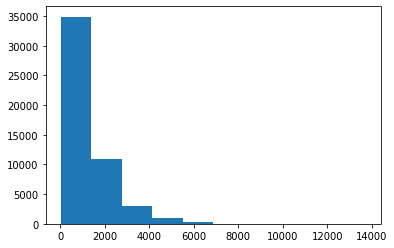

In [39]:
plt.hist([len(t) for t in texts])

In [40]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
bow = tok.texts_to_matrix(docs, mode='count')
bow.shape


(2, 124254)

In [41]:
docs=["I love","Hala Hala","Zaky"]
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(docs)
bow = tok.texts_to_matrix(docs,mode="count")
print("word index: ",tok.word_index)
print("Bag Of Word: ",bow)
print("text sequence: ",tok.texts_to_sequences(docs))



word index:  {'UNK': 1, 'hala': 2, 'i': 3, 'love': 4, 'zaky': 5}
Bag Of Word:  [[0. 0. 0. 1. 1. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
text sequence:  [[3, 4], [2, 2], [5]]


In [42]:
tok.word_index

{'UNK': 1, 'hala': 2, 'i': 3, 'love': 4, 'zaky': 5}

# Putting gll together

In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

# We will use the tokenizer of keras

In [ ]:
# Fit the tokenizer

# Either pre-define vocab size
# Or get the max possible vocab from text
vocab_sz = 10000 # None means all
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_test = tok.texts_to_matrix(tst_texts, mode='binary')



In [ ]:
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.4227 - accuracy: 0.8352 - val_loss: 1.1570 - val_accuracy: 0.2028
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2475 - accuracy: 0.9120 - val_loss: 1.0612 - val_accuracy: 0.4638
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1676 - accuracy: 0.9445 - val_loss: 0.7704 - val_accuracy: 0.6517
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1237 - accuracy: 0.9620 - val_loss: 0.7726 - val_accuracy: 0.6863
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0953 - accuracy: 0.9701 - val_loss: 1.1220 - val_accuracy: 0.6088
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0728 - accuracy: 0.9793 - val_loss: 0.7723 - val_accuracy: 0.7390
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0556 - accuracy: 0.9853 - val_loss: 1.1460 - val_accuracy: 0.6738
Epoch 8/20
30

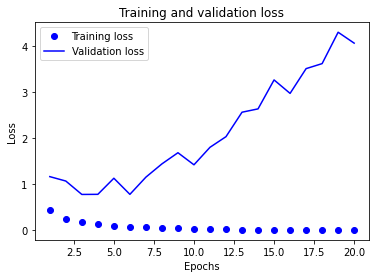

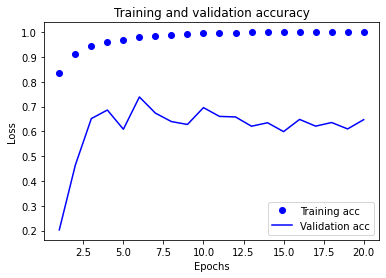

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# So what happened???!!! why this bad accuracy 
##The reason is that we assumed the data is shuffled! If you revise the get_texts function we implemented, it takes all the class data in sequence Our train/val split did not contain any shuffling.
##To fix this, we could manually shuffle:

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 82ms/step - loss: 0.5117 - accuracy: 0.7852 - val_loss: 0.3898 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3012 - accuracy: 0.9046 - val_loss: 0.3040 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2175 - accuracy: 0.9282 - val_loss: 0.2840 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1735 - accuracy: 0.9440 - val_loss: 0.2939 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1400 - accuracy: 0.9553 - val_loss: 0.2951 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1159 - accuracy: 0.9637 - val_loss: 0.3138 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0925 - accuracy: 0.9728 - val_loss: 0.3699 - val_accuracy: 0.8686
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

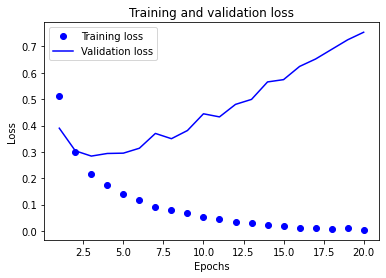

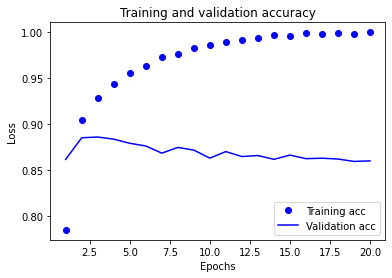

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Count

In [ ]:
x_train = tok.texts_to_matrix(trn_texts, mode='count')
x_test = tok.texts_to_matrix(tst_texts, mode='count')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5344 - accuracy: 0.7917 - val_loss: 0.4097 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3258 - accuracy: 0.8983 - val_loss: 0.3334 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2385 - accuracy: 0.9226 - val_loss: 0.3032 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1888 - accuracy: 0.9364 - val_loss: 0.3328 - val_accuracy: 0.8725
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1526 - accuracy: 0.9498 - val_loss: 0.3161 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1228 - accuracy: 0.9621 - val_loss: 0.3365 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1029 - accuracy: 0.9699 - val_loss: 0.3638 - val_accuracy: 0.8758
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

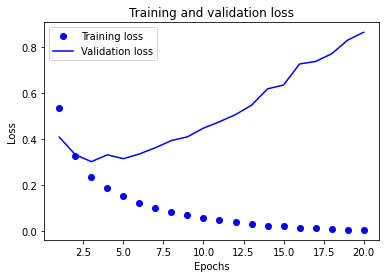

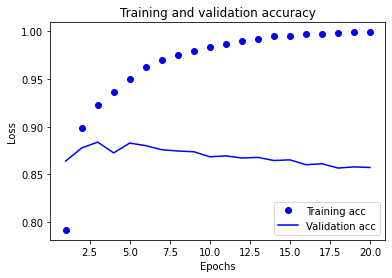

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#freq

In [ ]:
# Extract binary BoW features
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
x_train = tok.texts_to_matrix(trn_texts, mode='freq')
x_test = tok.texts_to_matrix(tst_texts, mode='freq')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 95ms/step - loss: 0.6880 - accuracy: 0.5801 - val_loss: 0.6816 - val_accuracy: 0.5243
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.6721 - accuracy: 0.6701 - val_loss: 0.6623 - val_accuracy: 0.7779
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6475 - accuracy: 0.7889 - val_loss: 0.6378 - val_accuracy: 0.8183
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6173 - accuracy: 0.8257 - val_loss: 0.6079 - val_accuracy: 0.8262
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5825 - accuracy: 0.8438 - val_loss: 0.5739 - val_accuracy: 0.8299
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5429 - accuracy: 0.8549 - val_loss: 0.5369 - val_accuracy: 0.8391
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5015 - accuracy: 0.8663 - val_loss: 0.5004 - val_accuracy: 0.8414
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

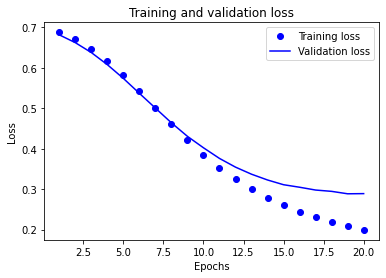

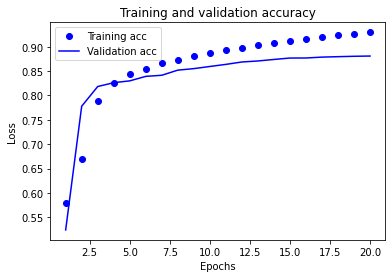

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#As you can see, normalizing the counts correctly has a good effect to delay the overfitting. Even at the max epoch, we got higher acc (88%)

#TFIDF

In [ ]:
x_train = tok.texts_to_matrix(trn_texts, mode='tfidf')
x_test = tok.texts_to_matrix(tst_texts, mode='tfidf')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4528 - accuracy: 0.8037 - val_loss: 0.3310 - val_accuracy: 0.8771
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2160 - accuracy: 0.9270 - val_loss: 0.3115 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1390 - accuracy: 0.9543 - val_loss: 0.3294 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0958 - accuracy: 0.9717 - val_loss: 0.3719 - val_accuracy: 0.8729
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0644 - accuracy: 0.9818 - val_loss: 0.4044 - val_accuracy: 0.8724
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0400 - accuracy: 0.9909 - val_loss: 0.4828 - val_accuracy: 0.8635
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0285 - accuracy: 0.9940 - val_loss: 0.5311 - val_accuracy: 0.8645
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

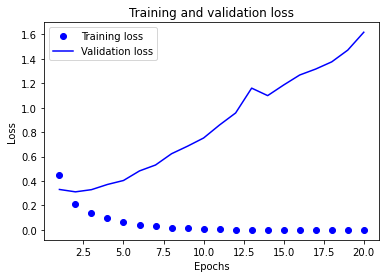

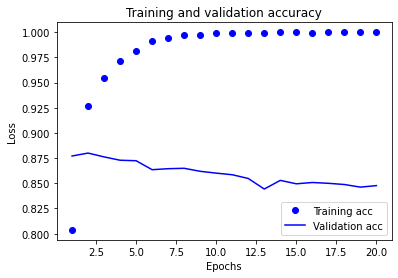

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#TF-IDF not normalized?

In the above setting, TFIDF in keras texts_to_matrix produce non normalized values. This is because the IDF ~= 1/DF, but log(1+DF) (for math convenience the log is calculated): http://www.tfidf.com/

https://github.com/keras-team/keras/issues/2974

For this bug, it's better to use sklearn TfidfVectorizer

#Using sklearn TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Extract binary BoW features
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(trn_texts+tst_texts)


x_train = vectorizer.transform(trn_texts)
x_test =vectorizer.transform(tst_texts)
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

Now we get normalized values, but on ALL vocab.

If we try to array we will get out of mem!

How to limit the vocab?

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
		  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(tf.sparse.reorder(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Let's see the effect without text cleaning steps:

In [ ]:

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

#trn_texts = normalize_corpus(trn_texts)
#tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_test = tok.texts_to_matrix(tst_texts, mode='binary')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5166 - accuracy: 0.7895 - val_loss: 0.3892 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3083 - accuracy: 0.9033 - val_loss: 0.3346 - val_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2273 - accuracy: 0.9265 - val_loss: 0.2806 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1807 - accuracy: 0.9419 - val_loss: 0.2807 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1475 - accuracy: 0.9525 - val_loss: 0.3178 - val_accuracy: 0.8790
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1245 - accuracy: 0.9614 - val_loss: 0.3099 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1035 - accuracy: 0.9689 - val_loss: 0.3125 - val_accuracy: 0.8826
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

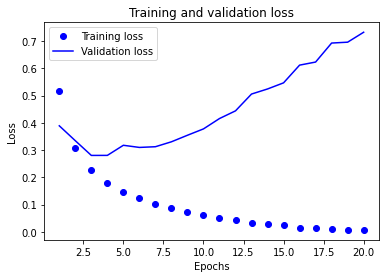

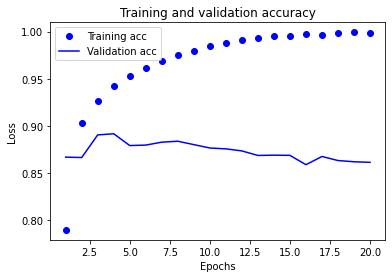

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#As you can see, the effect is minimal, but the val curve a bit smoother in case of text clean-up

Why?

We already limit the vocab to the most frequent 10K words, and we use BoW features, so cleanining up the text has minimal effect, since the words context is neglected (high frequent words are likely to always be scored no matter different morphologies might be missed sometimes).

For sequence models for example with word embeddings (as we will see), the context of the word will have strong effect, so the clean up step will have more importance.

#--------------------------------------------------------------------------------
#Word Embedding
Keras Embedding Layer example

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
'Good work','Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

##We print the encoded docs 

In [ ]:
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


##We see that the max len is 4 so we will pad the smallest sentence to 4
##you will see padding will add 0 to fill out the remaining of the small sentences


In [ ]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


##Then we will define the embedding model using Embedding which take the lenght and width of the embedding matrix.
##The lenght is the number of word index of the tokenizer +1 keep in mind +1 as you add the index of padding and if you pad and using different index to unknown words you will add 2 instead of 1
##The width of embedding matrix is the desired length of vector you want to be for example you want every word to represrent by 8 vector component

In [ ]:
import numpy as np
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(x=np.array(padded_docs),y=np.array(labels),epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(x=np.array(padded_docs),y=np.array(labels), verbose=0)
print('Accuracy: %f' % (accuracy*100))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              120       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
Accuracy: 80.000001


In [ ]:
emb_sz = 50
n_latent_factors =50
vocab_sz = 10000
model = models.Sequential()
model.add(layers.Embedding(vocab_sz+1, n_latent_factors, input_length=vocab_sz))
model.add(layers.Flatten())
model.add(layers.Dense(emb_sz, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)

x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_test = tok.texts_to_matrix(tst_texts, mode='binary')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)




model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 [==============================] - 115s 4s/step - loss: 4.3301 - accuracy: 0.4971 - val_loss: 1.1557 - val_accuracy: 0.5038
Epoch 2/20
 2/30 [=>............................] - ETA: 1:17 - loss: 1.0352 - accuracy: 0.5303

KeyboardInterrupt: ignored

#we see this model is too slow and its accuracy is so bad as we use the maxlength = vocab_size we will use maxlength=100 and see what happens?


In [ ]:
vocab_size = 10000
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=vocab_size)

y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')


max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

n_latent_factors = 25
model = models.Sequential()
model.add(layers.Embedding(vocab_sz+1, n_latent_factors, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6896 - accuracy: 0.5499 - val_loss: 0.6750 - val_accuracy: 0.6100
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5830 - accuracy: 0.7672 - val_loss: 0.5079 - val_accuracy: 0.7859
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3727 - accuracy: 0.8703 - val_loss: 0.3987 - val_accuracy: 0.8215
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2515 - accuracy: 0.9141 - val_loss: 0.3636 - val_accuracy: 0.8390
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1777 - accuracy: 0.9432 - val_loss: 0.3706 - val_accuracy: 0.8403
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1169 - accuracy: 0.9700 - val_loss: 0.3770 - val_accuracy: 0.8433
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0765 - accuracy: 0.9827 - val_loss: 0.3943 - val_accuracy: 0.8405
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

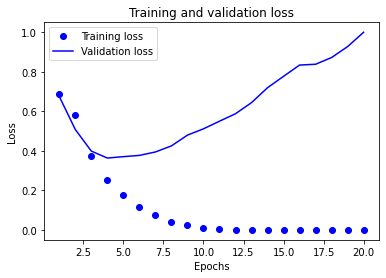

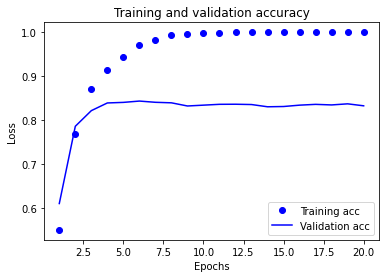

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#How tobuilt your own word2vec

Specifically, each sentence must be tokenized, meaning divided into words and prepared.

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

There are many parameters on this constructor; a few noteworthy arguments you may wish to confgure are:

• size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

• window: (default 5) The maximum distance between a target word and words around the target word.

• min count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count
will be ignored.

• workers: (default 3) The number of threads to use while training.

• sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

The defaults are often good enough when just getting started. If you have a lot of cores, as most modern computers do, I strongly encourage
you to increase workers to match the number of cores (e.g. 8).


In [2]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model=Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


##After the model is trained, it is accessible via the wv attribute. This is the actual word vector model in which queries can be made. For example,you can print the learned vocabulary of tokens (words) as follows:


In [3]:
words=list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [4]:
#access word vector
model["second"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 2.4722563e-03, -2.8006199e-03,  4.1838625e-04, -4.4674291e-03,
        1.8960024e-03, -2.0299943e-03,  6.2118267e-04, -2.4021869e-03,
        2.3193448e-03,  2.2526709e-03,  1.7117852e-03, -1.0136520e-03,
        1.4181765e-03,  4.4384068e-03, -4.3880795e-03,  4.3218718e-03,
        4.8256617e-05,  4.5090318e-03, -2.9266777e-03,  7.1057200e-04,
        2.8729308e-03, -3.7870011e-03,  3.4507564e-03, -3.4665384e-03,
       -3.3874761e-03, -5.3190743e-04,  4.4443421e-03, -3.8402271e-03,
        4.2560976e-03, -2.1911786e-04, -2.6962885e-03,  2.2291443e-03,
       -1.1842255e-03, -1.4680492e-03,  1.6485382e-03, -3.7844041e-03,
        3.9281626e-03, -3.7529387e-03,  2.0664881e-03, -2.4654567e-03,
       -8.6035841e-04,  4.4220774e-03, -4.9567586e-03,  3.3569830e-03,
        4.5048376e-03, -1.5285771e-03, -1.3011718e-03,  2.4048248e-03,
       -3.5440768e-03,  2.7768076e-03,  4.5378795e-03,  3.6312919e-03,
       -2.9664878e-03,  1.0351040e-03,  2.0604150e-03,  2.7226969e-03,
      

In [5]:
#save the model 
model.save("model.bin")

#load the model
new_model=Word2Vec.load("model.bin")

##to visualize this words

In [6]:
from sklearn.decomposition import PCA
X=model[model.wv.vocab]
pca=PCA(n_components=2)
results=pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


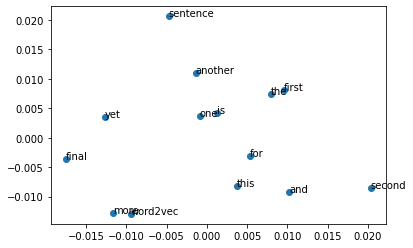

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=results[:,0],y=results[:,1])
words=list(model.wv.vocab)
for i,word in enumerate(words):
  plt.annotate(word,xy=(results[i,0],results[i,1])) 
plt.show()

##we can visulize using TSNE

In [9]:
from sklearn.manifold import TSNE
results=TSNE(random_state=123).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


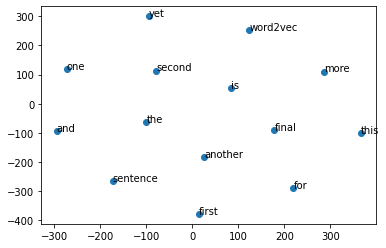

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=results[:,0],y=results[:,1])
words=list(model.wv.vocab)
for i,word in enumerate(words):
  plt.annotate(word,xy=(results[i,0],results[i,1])) 
plt.show()

In [11]:
def make_sentences(text):
  text=text.split(sep=",")
  sentences=[]
  for index in text:
    sentences.append(index.split())
  return sentences


In [12]:
s="العِلْـمُ والجمع العُلومْ (المسمّى باللاتينيّة scientia، أي المعرف) هو أسلوب منهجي يقوم ببناء وتنظيم المعرفة في شكل تفسيرات وتوقعات قابلة للاختبار حول الكون, يرتكز مفهوم العلم على مصطلح المنهجية العلمية الذي بدوره يقوم بدراسة البيانات ووضع فرضيات لتفسيرها ويقوم باختبارها وكل هذه العملية للوصول إلى معرفة قائمة على التجربة والتأكد من صحتها بدل التخمين, يمكن تتبع جذور العلوم الأولى إلى مصر القديمة وبلاد ما بين النهرين في حوالي 3500 إلى 3000 سنة قبل الميلاد, شكلت مساهماتهم في الرياضيات وعلم الفلك والطب الفلسفة اليونانية الطبيعية للعصور الكلاسيكية القديمة, حيث بُذلت محاولات رسمية لتقديم تفسيرات للأحداث في العالم المادي بناءً على أسباب طبيعية, بعد سقوط الإمبراطورية الرومانية الغربية, تدهورت المعرفة اليونانية في أوروبا الغربية خلال القرون الأولى (400 إلى 1000 للميلاد) في العصور الوسطى ولكن جرى الحفاظ عليها وتطويرها في العالم الإسلامي خلال العصر الذهبي الإسلامي, انتعشت وتُرجمت الأعمال اليونانية وأضيفت إليها الملاحظات الإسلامية لما أصبح اسمها الفلسفة الإسلامية وانتقلت إلى أوروبا من القرن العاشر إلى الثالث عشر مما أحيا الفلسفة الطبيعية, والتي تحولت لاحقًا بواسطة الثورة العلمية التي بدأت في القرن السادس عشر لتجديد الأفكار والاكتشافات التي بدورها أزاحت المفاهيم والتقاليد اليونانية السابقة, واستبدلتها بالمنهجية العلمية, سرعان ما لعبت الطريقة العلمية دورًا أكبر في تكوين المعرفة, ولم يبدأ ظهور العديد من السمات المؤسسية والمهنية للعلوم حتى القرن التاسع عشر, إلى جانب تغيير الفلسفة الطبيعية إلى مفهوم العلوم الطبيعية, ينقسم العلم الحديث عادة إلى ثلاثة فروع رئيسية تتكون من العلوم الطبيعية (مثل الأحياء والكيمياء والفيزياء), والتي تدرس الطبيعة بالمعنى الأوسع, العلوم الاجتماعية مثل (الاقتصاد وعلم النفس وعلم الاجتماع), التي تدرس الأفراد والمجتمعات, والعلوم الشكلية مثل (المنطق والرياضيات وعلوم الحاسوب النظرية)، التي تدرس المفاهيم المجردة, هناك خلاف، حول ما إذا كانت العلوم الشكلية تشكل في الواقع علمًا لأنها لا تعتمد على أدلة تجريبية, وتوصف التخصصات التي تستخدم المعرفة العلمية الحالية لأغراض عملية, مثل الهندسة التطبيقية والطب، بأنها علوم تطبيقية, يعتمد العلم على الأبحاث التي تجرى عادة في المؤسسات الأكاديمية, والبحثية وكذلك في الوكالات الحكومية والشركات, أدى التأثير العملي للبحث العلمي إلى ظهور سياسات علمية تسعى إلى التأثير على المؤسسة العلمية من خلال إعطاء الأولوية لتطوير المنتجات التجارية والأسلحة والرعاية الصحية وحماية البيئة"

In [13]:
sentences=make_sentences(s)
sentences[0]



['العِلْـمُ',
 'والجمع',
 'العُلومْ',
 '(المسمّى',
 'باللاتينيّة',
 'scientia،',
 'أي',
 'المعرف)',
 'هو',
 'أسلوب',
 'منهجي',
 'يقوم',
 'ببناء',
 'وتنظيم',
 'المعرفة',
 'في',
 'شكل',
 'تفسيرات',
 'وتوقعات',
 'قابلة',
 'للاختبار',
 'حول',
 'الكون']

In [14]:
# train model
model=Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

words=list(model.wv.vocab)
words

Word2Vec(vocab=249, size=100, alpha=0.025)


['العِلْـمُ',
 'والجمع',
 'العُلومْ',
 '(المسمّى',
 'باللاتينيّة',
 'scientia،',
 'أي',
 'المعرف)',
 'هو',
 'أسلوب',
 'منهجي',
 'يقوم',
 'ببناء',
 'وتنظيم',
 'المعرفة',
 'في',
 'شكل',
 'تفسيرات',
 'وتوقعات',
 'قابلة',
 'للاختبار',
 'حول',
 'الكون',
 'يرتكز',
 'مفهوم',
 'العلم',
 'على',
 'مصطلح',
 'المنهجية',
 'العلمية',
 'الذي',
 'بدوره',
 'بدراسة',
 'البيانات',
 'ووضع',
 'فرضيات',
 'لتفسيرها',
 'ويقوم',
 'باختبارها',
 'وكل',
 'هذه',
 'العملية',
 'للوصول',
 'إلى',
 'معرفة',
 'قائمة',
 'التجربة',
 'والتأكد',
 'من',
 'صحتها',
 'بدل',
 'التخمين',
 'يمكن',
 'تتبع',
 'جذور',
 'العلوم',
 'الأولى',
 'مصر',
 'القديمة',
 'وبلاد',
 'ما',
 'بين',
 'النهرين',
 'حوالي',
 '3500',
 '3000',
 'سنة',
 'قبل',
 'الميلاد',
 'شكلت',
 'مساهماتهم',
 'الرياضيات',
 'وعلم',
 'الفلك',
 'والطب',
 'الفلسفة',
 'اليونانية',
 'الطبيعية',
 'للعصور',
 'الكلاسيكية',
 'حيث',
 'بُذلت',
 'محاولات',
 'رسمية',
 'لتقديم',
 'للأحداث',
 'العالم',
 'المادي',
 'بناءً',
 'أسباب',
 'طبيعية',
 'بعد',
 'سقوط',
 'الإمبراطورية',
 'الروم

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


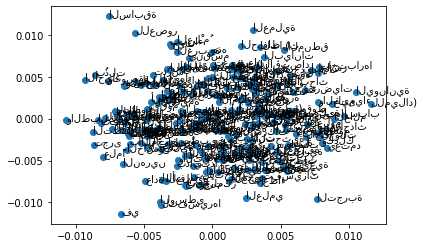

In [15]:
X=model[model.wv.vocab]
pca=PCA(n_components=2)
results=pca.fit_transform(X)

plt.scatter(x=results[:,0],y=results[:,1])
words=list(model.wv.vocab)
for i,word in enumerate(words):
  plt.annotate(word,xy=(results[i,0],results[i,1])) 
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


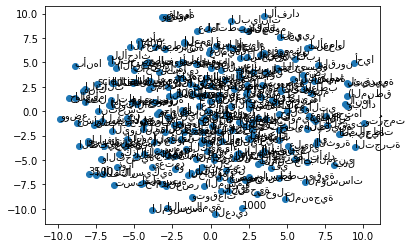

In [16]:
results=TSNE(random_state=123).fit_transform(X)
plt.scatter(x=results[:,0],y=results[:,1])
words=list(model.wv.vocab)
for i,word in enumerate(words):
  plt.annotate(word,xy=(results[i,0],results[i,1])) 
plt.show()
